# Big Data para Dados Públicos

##### Maciel C. Vidal

Na aula de hoje iremos continuar a trabalhar com o Dask, na mesma proposta da aula passada:
- Nosso computador pessoal
- Ferramentas que permitem processamento paralelo
- Que não carregam todo o arquivo em memória

## Dask

O Dask (https://dask.org) é uma ferramenta open-source escrita em Python (https://github.com/dask/dask), que permite análise de dados utilizando processamento paralelo.

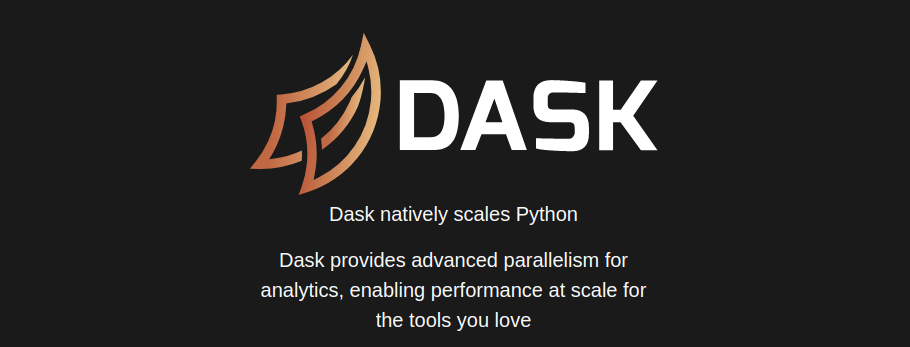

## Importando as bibliotecas necessárias

Agora, vamos importar as bibliotecas necessárias:

In [ ]:
# Para utilizar recursos do sistema
import os
import sys

# Bibliotecas DASK
import dask
from dask.distributed import Client
import dask.dataframe as dd # similar ao pandas
import dask.multiprocessing

# Para plot
%matplotlib inline
import matplotlib.pyplot as plt

Caso obtenha algum erro, utilize o **!python -m pip install** para instalar a biblioteca ausente!

Vamos conferir com qual versão da biblioteca **Dask** estamos trabalhando?

In [ ]:
dask.__version__

In [ ]:
!python -m pip show dask

Você também pode conferir de onde está executando o Python e qual a versão

In [ ]:
print('Executável:')
print(sys.executable)

print('\nVersão do Python:')
print(sys.version)

Vamos conferir em qual diretório iremos trabalhar (é o diretório do notebook)

In [ ]:
print('O seu notebook está na pasta:')
print(os.getcwd())

## Download dos dados

Iremos continuar a trabalhar com uma amostra da base RAIS.

### Origem dos dados (Aula 01)

Se você já não efetuou o download dos dados na aula passada, **ABRA O NOTEBOOK da AULA 02** e **FAÇA O DOWNLOAD!**


### Origem dos dados (Aula 02)

Para a aula 03, iremos utilizar mais algumas planilhas para enriquecer a qualidade dos nossos dados.

Faça o download dos arquivos e mova para a pasta da aula 03. Utilize os links:
- https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/aula03/bairros_sp.csv
- https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/aula03/cnae_20_subclasse.csv
- https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/aula03/municipio.csv
- https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/aula03/RAIS_estabelecimento_layout2018e2019.xls
- https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/aula03/RAIS_vinculos_layout2018e2019.xls


### Formatos de arquivos

Quando vamos trabalhar com uma base de dados nova, uma das principais dificuldades envolve entender o formato de armazenamento dos dados e como trabalhar com eles. É preciso entender que os dados podem estar armazenados nos mais diversos formatos, com diversas codificações, necessitando de tratativas no momento de leitura.

#### Formato CSV

**1) O que é um CSV?**

O formato CSV (*Comma-separated values*) é um formato de arquivo no qual os dados são armazenados em formato de texto. Cada linha identifica um registro e as colunas (variáveis) são identificadas ou truncadas na vírgula.

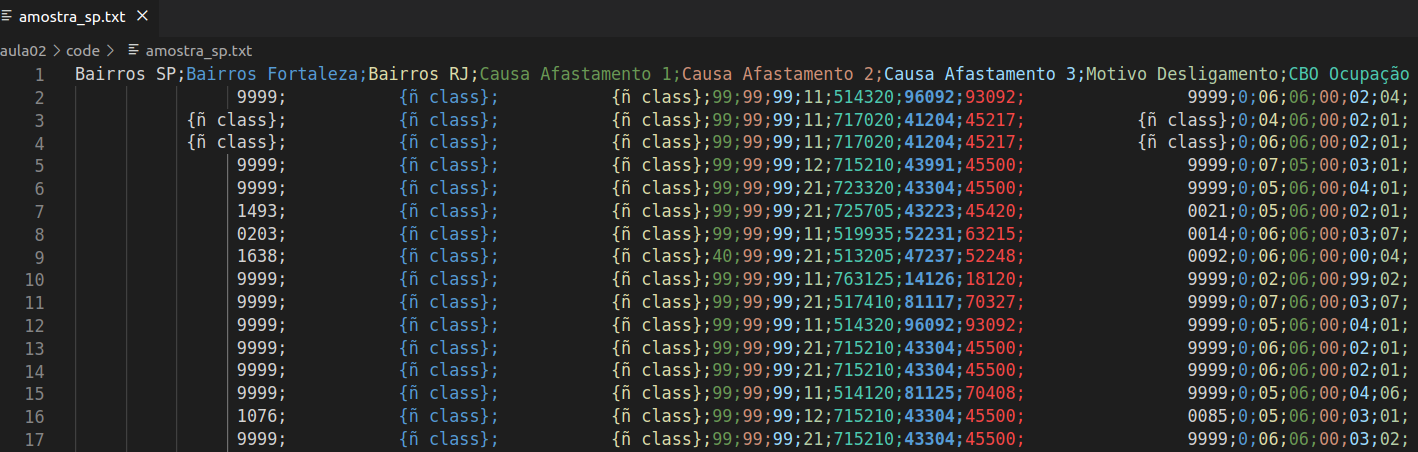

**2) Quais as vantagens do CSV?**

- Formato bastante conhecido, facilitando a disponibilização de dados entre instituições ou pessoas.
- Muitas bibliotecas já trabalham com CSV.

**3) Quais as desvantagens do CSV?**

- É formato de texto, então podemos ter problemas com codificação.
- Não provê *schema* (tipos de dados nas colunas).

#### Formato XLSX

Arquivo de planilhas criadas principalmente com Microsoft Excel seguindo o padrão Open XML (https://en.wikipedia.org/wiki/Office_Open_XML). Armazena dados em formato tabular, com células organizadas em uma grade de linhas e colunas (planilhas). É um formato muito utilizado em ambiente empresarial

#### Apache Parquet

Um formato de código aberto muito utilizado em ambientes Big Data, devido a seu desenho buscando eficiência em ambientes distribuídos (https://databricks.com/glossary/what-is-parquet).

<img src="https://parquet.apache.org/images/FileLayout.gif">


## Configurando um ambiente Dask

Agora iremos configurar um ambiente Dask para execução das nossas análises. Para isso, iremos criar um **client**

In [ ]:
client = Client(n_workers=2, threads_per_worker=1, memory_limit='auto')

perceba que, ao exibir o client, temos acesso a uma URL que nos permitirá acompanhar informações sobre o consumo de recursos durante a execução de tarefas

In [ ]:
client

Para entender o funcionamento de um Dask Client:

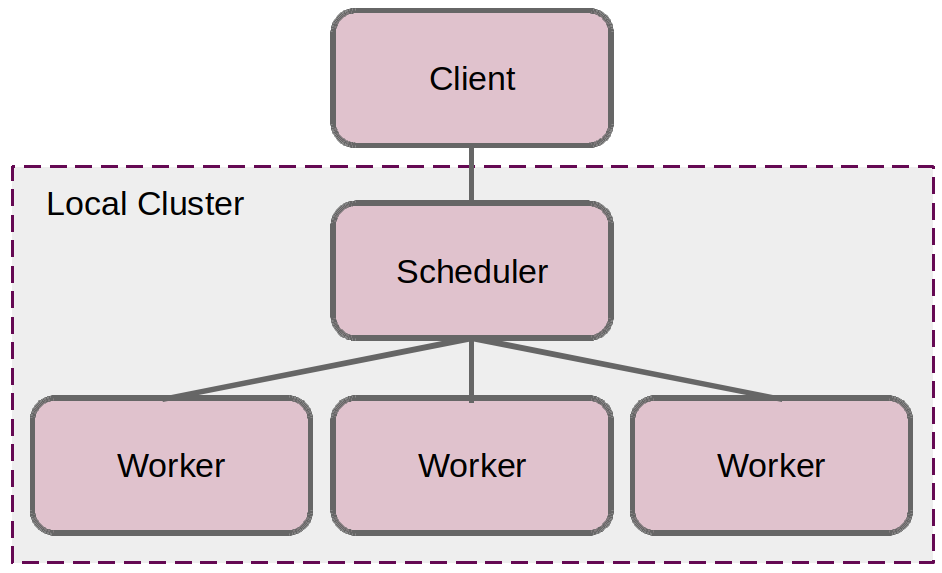

Vamos definir:

- **Client**: ponto de entrada para os usuários que querem consumir recursos computacionais.

- **Scheduler**: gerencia um cluster (grupo) de workers. Distribui tarefas entre eles.

- **Worker**: fazem de fato a análise dos dados. Computam as tarefas atribuídas a eles pelo Scheduler e trocam informações entre sí quando necessário.

## Lendo um arquivo

A mais conhecida e uma das principais estruturas de dados utilizadas na área de dados é o Pandas DataFrame, que consisiste em um conjunto de Pandas Series. Resumindo, um DataFrame consegue representar dados em forma de tabela, onde cada coluna é uma variável, semelhante a uma planilha do Excel.

Uma característica interessante do Dask é a disponibilidade do **dask.dataframe** (https://docs.dask.org/en/latest/dataframe.html). Isto nos permitirá realizar a análise dos dados utilizando uma interface que já nos seja familiar. Obs: no início fizemos **import dask.dataframe as dd**, então utilizaremos **dd** para nos referirmos ao **dask.dataframe**.

<img src="https://docs.dask.org/en/latest/_images/dask-dataframe.svg" width="200" height="200">

Perceba que precisamos especificar **sep=';'** como parâmetro na leitura dos dados (destes dados específicos).

Ainda, é preciso definir o encoding correto do arquivo com **encoding='ISO-8859-1'**. Atenção, o arquivo que você esta lendo pode ser com encoding **UTF-8**.

Por fim, a leitura ficará como:

In [ ]:
dados_sp = dd.read_csv(
    "RAIS_VINC_PUB_SP.txt",
    sep=";",
    encoding="ISO-8859-1",
    dtype={"CBO Ocupação 2002": "category"},
)

## Amostra dos dados

Semelhante ao Pandas, podemos solicitar uma pequena amostra dos dados com

In [ ]:
# Seu código AQUI!

ou com

In [ ]:
# Seu código AQUI!

### Dicionário de Dados

Outra dificuldade bastante comum ao trabalharmos com novas bases de dados, sejam bases públicas ou mesmo em um ambiente empresarial, é entender os dados ali representados.

A ideia do uso de técnicas de análise de dados é:
- A partir de um problema (pergunta)
- Conseguir dados (variáveis)
- Analisar dados e responder pergunta (modelos de Machine Learning, Gráficos, estatísticas, Dashboard)

Então, por exemplo, a partir da indagação da área de negócios de um banco: **"*alguns clientes que realizaram empréstimos comigo não estão honrando os pagamentos e eu não sei o motivo*"**

Poderíamos tentar utilizar o histórico de dados de empréstimo para tentar entender o que leva uma empresa a não honrar o pagamento de um empréstimo. O dicionário de dados seria o recurso inicial que nos ajudaria a entender a base.

Dicionário de dados exemplo:
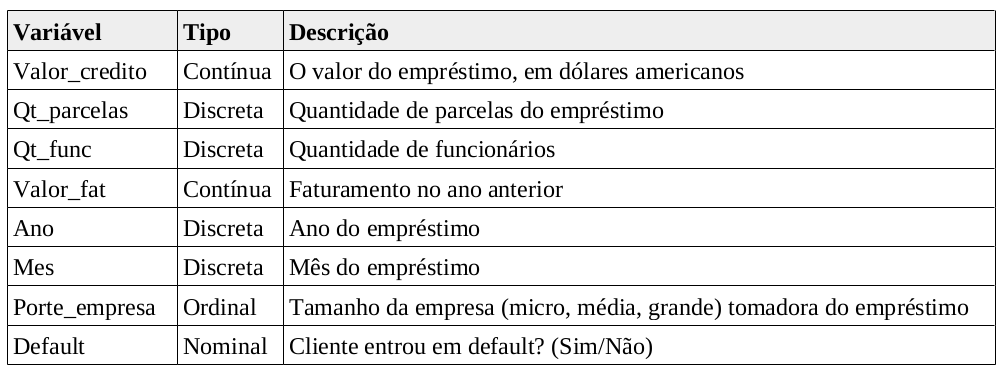

## Inferência do Schema

Uma das grandes desvantagens dos arquivos CSV é que não há definição de tipo dos dados das colunas. Os tipos são inferidos automaticamente pelo Dask e podem ser verificados com:

In [ ]:
dados_sp.dtypes

## Quantidade de registros

Podemos contar quantas linhas estão no arquivo ao utilizar **len(dataframe)**. Antes de executar a célula, abra o **Dask Scheduler System** e monitore seu cluster enquanto o comando é executado.

**OBS**: O Link para o **Dask Scheduler System** está na célula onde criamos a variável `client`.

Ainda, perceba que utilizaremos `%%time` no início das células para termos uma ideia do tempo necessário para realizar as tarefas solicitadas!

In [ ]:
%%time
n_col = # Seu código AQUI!
print(f'Temos {n_col} colunas!')

In [ ]:
%%time
n_linhas = # Seu código AQUI!
print(f'Temos {n_linhas} linhas!')

## Tabelas de Frequência

Uma ferramenta bastante útil para análise univariada de variáveis categóricas é o uso de tabelas de frequência. Podemos fazer isso utilizando **.value_counts()** em um Dask DataFrame.

Crie uma tabela de frequência da coluna **CBO Ocupação 2002**.

In [ ]:
freq_cbo = # Seu código AQUI!
freq_cbo

Você deve ter percebido que apenas com `.value_counts()` não obtivemos nada interessante como resposta! Isto acontece porque o cálculo foi configurado (Task Graph) porém ainda não executado/calculado.

<img src="https://docs.dask.org/en/stable/_images/dask-overview.svg">

Para obtenção dos resultados, vamos utilizar `.compute()`

Aproveitando, vamos adicionar `%%time` para computar o tempo de processamento

In [ ]:
%%time
freq_cbo = # Seu código AQUI!
freq_cbo

In [ ]:
type(freq_cbo)

Agora vamos solicitar as top-10 ocupações mais frequentes

In [ ]:
top_10 = freq_cbo.head(10)
top_10

**Se não fez na aula 02**: Para entender o significado destas ocupações, faça o download do arquivo https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/estrutura_cbo.zip e importe principalmente as planilhas **CBO2002 - Ocupacao.csv**, **CBO2002 - Sinonimo.csv** e **CBO2002 - PerfilOcupacional.csv**

In [ ]:
ocupacao = dd.read_csv(
    "CBO2002 - Ocupacao.csv",
    sep=";",
    encoding="ISO-8859-1",
    dtype={"CODIGO": "category"},
)

In [ ]:
ocupacao.head()

In [ ]:
ocupacao.dtypes

Como exemplo, vamos filtrar o significado da CBO `'411005'`. Precisaremos fazer um `.loc`, informando o critério de filtro nas linhas e nas colunas (nesta ordem).

**OBS**: o símbolo de dois pontos (`:`) significa **"todas as linhas"** (ou colunas, dependendo se é utilizado antes ou após a vírgula).

In [ ]:
# Seu código AQUI!

vamos conferir novamente o tipo de `top_10` e transformá-lo para `Pandas DataFrame`

In [ ]:
type(top_10)

In [ ]:
top_10 = top_10.to_frame()
top_10

Utilizando `top_10.columns`, podemos tanto consultar quanto alterar os nomes das columas do DataFrame:

In [ ]:
top_10.columns = ['Qtde']
top_10

Vamos definir a coluna `'CODIGO'` como index da ocupação e transformá-lo em `Pandas DataFrame`

In [ ]:
ocupacao = ocupacao.set_index('CODIGO').compute()
ocupacao

In [ ]:
type(ocupacao)

E Fazer um `.join()`, conectando cada registro do DataFrame `top_10` com a sua explicação no DataFrame `ocupacao`.

Para mais detalhes, acesse: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [ ]:
top_10 = top_10.join(ocupacao, how='left')
top_10

## Gráficos com `matplotlib` e `plotly`

Vamos construir um gráfico de barras utilizando `matplotlib`

In [ ]:
top_10.plot.bar(x='TITULO')

Agora, faça um gráfico de barras utilizando plotply express (https://plotly.com/python/bar-charts/)

In [ ]:
#!python -m pip install plotly.express nbformat

In [ ]:
import plotly.express as px

fig = px.bar(top_10, x='TITULO', y='Qtde', opacity=0.8)
fig.show()

## Exercício 1

Procure na página de exemplos https://plotly.com/python/bar-charts/ como alterar o título de um gráfico e o label do eixo x.

Após configurar título e label do eixo x, descubra como deixar a cor da barra em função da frequência da ocupação.

## Experimento

Calcule a média da coluna **Vl Rem Novembro CC**.

Mas antes:
- Verifique o tipo de dados da coluna. Será necessária alguma alteração? Você precisará transformar um valor numérico que está como texto para o padrão americano, convertendo-o então para float.

In [ ]:
type(dados_sp['Vl Rem Novembro CC'])

In [ ]:
dados_sp.dtypes

In [ ]:
dados_sp['Vl Rem Novembro CC'] = dados_sp['Vl Rem Novembro CC'].str.replace(',', '.')
dados_sp['Vl Rem Novembro CC'] = dados_sp['Vl Rem Novembro CC'].astype('float')

In [ ]:
type(dados_sp['Vl Rem Novembro CC'])

In [ ]:
%%time
dados_sp['Vl Rem Novembro CC'].mean().compute()

## Exercício 2

Calcule as demais medidas de interesse (desvio padrão, primeiro quartil, mediana, terceiro quartil, etc.) da coluna **Vl Rem Novembro CC**.

In [ ]:
%%time
# Complete AQUI!

## Exercício 3

Calcule as medidas resumo (média, desvio padrão, primeiro quartil, mediana, terceiro quartil) das colunas `Vl Rem Agosto CC`, `Vl Rem Setembro CC` e `Vl Rem Outubro CC`.

Você conseguiria fazer sem copiar e colar o código três vezes?!

## Exercício 4

Você deve produzir um dicionário de dados para um problema fictício. Descreva um problema e pense em quais dados você gostaria de ter disponíveis para análise.

Etapas:
- Descreva brevemente um problema solucionável com análise de dados
- Descreva o nome das variáveis disponíveis para análise
- Opcional: descreva o tipo de variável
- Explique o que o nome das variáveis significa

R:

## Exercício 5

Encontre o **Bairros SP** com mais registros na base. Então, abra no Dask o arquivo **bairros_sp.csv** e filtre com o **.loc** para encontrar a descrição deste bairro.

## Exercício 6

Considerando apenas os registros com **CNAE 2.0 Subclasse** igual a **1094500**:


**a)** Encontre a quantidade de registros.

**b)** O que é CNAE?! O que este termo significa? Procure no Google e responda.

**c)** Qual a descrição do CNAE **1094500**? No Python, abra o arquivo **cnae_20_subclass.csv** e filtre este CNAE.

**d)** Considerando os dados filtrados, conforme inicio do enunciado, qual a média, mediana e desvio padrão da coluna **Vl Rem Novembro CC**?

## Exercício 7

Dica: neste exercício, abra com o Dask o arquivo **municipio.csv** e faça **join** com a base de dados do RAIS (dados_sp)

Considerando o município de **Campinas**, encontre:

**a)** Qual o maior salário em Agosto?

**b)** Qual o CNAE mais frequente neste municipio?

**c)** Repita **a** e **b** com os registros de **Santos** ou **Praia Grande**.

## Exercício 8

**a)** Crie uma tabela de frequência das causas de afastamento (coluna `Causa Afastamento 1`).

**b)** Qual o significado destes códigos? Como podemos interpretar?!

Dica: abra o arquivo `RAIS_vinculos_layout2018e2019.xls` direto no Excel!